## Points of Dispense Analysis

##### Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

Read in distance and population data

In [3]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')

In [4]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [5]:
dist = dist_miles.values
N = population['population'].values
a_prop = population['anthrax'].values
f_prop = population['flood'].values

Read in saved model results from all scenarios

In [7]:
infile = open('pods_open_total2','rb')
pods_total2 = pickle.load(infile)
infile.close()

In [9]:
infile = open('pods_open_minmax2','rb')
pods_minmax2 = pickle.load(infile)
infile.close()

In [11]:
infile = open('pods_flood_total2','rb')
pods_flood_total2 = pickle.load(infile)
infile.close()

In [13]:
infile = open('pods_flood_minmax2','rb')
pods_flood_minmax2 = pickle.load(infile)
infile.close()

In [14]:
infile = open('pods_anthrax_total','rb')
pods_anthrax_total = pickle.load(infile)
infile.close()

In [16]:
infile = open('pods_anthrax_minmax2','rb')
pods_anthrax_minmax2 = pickle.load(infile)
infile.close()

### Comparing average and maximum distance by PODs opened

In [17]:
dist_compare = {'num_pods':[],
                'max_dist_total':[],
                'max_dist_minmax':[],
                'avg_dist_total':[],
                'avg_dist_minmax':[]}

for k in pods_minmax2.keys():
    dist_compare['num_pods'].append(k)
    
    # Minimize total distance
    avg_total = sum([dist[j,i] * N[j] for [j,i] in pods_total2[k]])/sum([N[j] for [j,i] in pods_total2[k]]) 
    max_total = max([dist[j,i] for [j,i] in pods_total2[k] if N[j]>0])
    
    # Minimize maximum distance
    avg_minmax = sum([dist[j,i] * N[j] for [j,i] in pods_minmax2[k]])/sum([N[j] for [j,i] in pods_minmax2[k]]) 
    max_minmax = max([dist[j,i] for [j,i] in pods_minmax2[k] if N[j]>0])
    
    dist_compare['max_dist_total'].append(max_total)
    dist_compare['max_dist_minmax'].append(max_minmax)
    dist_compare['avg_dist_total'].append(avg_total)
    dist_compare['avg_dist_minmax'].append(avg_minmax)

In [18]:
dist_df = pd.DataFrame(dist_compare)

In [19]:
dist_df

,num_pods,max_dist_total,max_dist_minmax,avg_dist_total,avg_dist_minmax
0,9,13.775728,10.204330,4.267829,5.788617
1,11,11.980543,8.611634,3.925441,5.546673
2,13,11.980543,8.035054,3.627632,4.868010
3,15,11.980543,7.387465,3.359295,4.518930
4,17,10.216086,7.161360,3.154158,4.295560
5,19,10.216086,6.823889,3.012964,4.140465
6,21,8.560094,6.823889,2.898323,4.090453
7,23,8.560094,6.823889,2.801122,4.328468
8,25,8.560094,6.823889,2.717389,4.157955
9,27,7.379106,6.823889,2.646108,4.488109


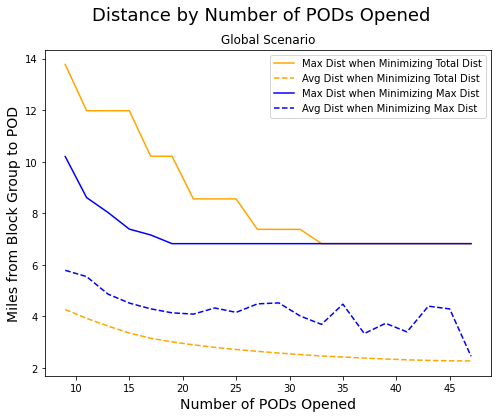

In [20]:
plt.figure(figsize=(8,6))

plt.plot(dist_df['num_pods'], dist_df['max_dist_total'], ls='-', color='orange',
         label='Max Dist when Minimizing Total Dist')
plt.plot(dist_df['num_pods'], dist_df['avg_dist_total'], ls='--', color='orange',
         label='Avg Dist when Minimizing Total Dist')
plt.plot(dist_df['num_pods'], dist_df['max_dist_minmax'], 
         'b-', label='Max Dist when Minimizing Max Dist')
plt.plot(dist_df['num_pods'], dist_df['avg_dist_minmax'], 
         'b--', label='Avg Dist when Minimizing Max Dist')
plt.suptitle('Distance by Number of PODs Opened', size=18)
plt.title('Global Scenario')
plt.ylabel('Miles from Block Group to POD', size=14)
plt.xlabel('Number of PODs Opened', size=14)
plt.legend()
plt.show()

Flood Scenario

In [21]:
dist_flood_compare = {'num_pods':[],
                      'max_dist_total':[],
                      'max_dist_minmax':[],
                      'avg_dist_total':[],
                      'avg_dist_minmax':[]}

for k in pods_flood_minmax2.keys():
    dist_flood_compare['num_pods'].append(k)
    
    # Minimize total distance
    avg_total = sum([dist[j,i] * N[j] * f_prop[j] for [j,i] in pods_flood_total2[k]])/sum([N[j] * f_prop[j] for [j,i] in pods_flood_total2[k]]) 
    max_total = max([dist[j,i] for [j,i] in pods_flood_total2[k] if (N[j] * f_prop[j])>0])
    
    # Minimize maximum distance
    avg_minmax = sum([dist[j,i] * N[j] * f_prop[j] for [j,i] in pods_flood_minmax2[k]])/sum([N[j] * f_prop[j] for [j,i] in pods_flood_minmax2[k]]) 
    max_minmax = max([dist[j,i] for [j,i] in pods_flood_minmax2[k] if (N[j] * f_prop[j])>0])    
    
    dist_flood_compare['max_dist_total'].append(max_total)
    dist_flood_compare['max_dist_minmax'].append(max_minmax)
    dist_flood_compare['avg_dist_total'].append(avg_total)
    dist_flood_compare['avg_dist_minmax'].append(avg_minmax)

In [22]:
dist_flood_df = pd.DataFrame(dist_flood_compare)

In [23]:
dist_flood_df

,num_pods,max_dist_total,max_dist_minmax,avg_dist_total,avg_dist_minmax
0,1,12.204727,11.145331,5.602368,6.837833
1,3,7.075253,6.960329,2.829890,3.555973
2,5,4.870587,4.557443,2.336842,2.356763
3,7,4.065924,4.065924,2.295399,2.383845
4,9,4.065924,4.065924,2.294548,2.391858
5,11,4.065924,4.065924,2.294548,2.351427
6,13,4.065924,4.065924,2.294548,2.383137
7,15,4.065924,4.065924,2.294548,2.427444
8,17,4.065924,4.065924,2.294548,2.441967
9,19,4.065924,4.065924,2.294548,2.296844


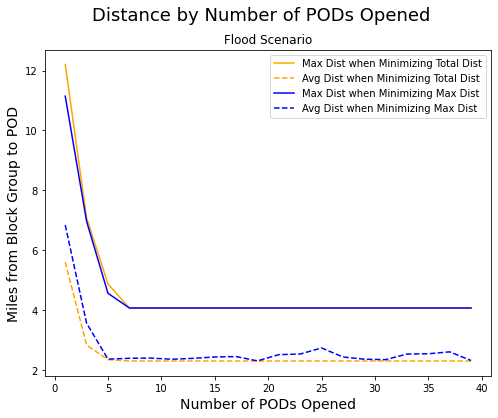

In [24]:
plt.figure(figsize=(8,6))

plt.plot(dist_flood_df['num_pods'], dist_flood_df['max_dist_total'], ls='-', color='orange',
         label='Max Dist when Minimizing Total Dist')
plt.plot(dist_flood_df['num_pods'], dist_flood_df['avg_dist_total'], ls='--', color='orange',
         label='Avg Dist when Minimizing Total Dist')
plt.plot(dist_flood_df['num_pods'], dist_flood_df['max_dist_minmax'], 
         'b-', label='Max Dist when Minimizing Max Dist')
plt.plot(dist_flood_df['num_pods'], dist_flood_df['avg_dist_minmax'], 
         'b--', label='Avg Dist when Minimizing Max Dist')
plt.suptitle('Distance by Number of PODs Opened', size=18)
plt.title('Flood Scenario')
plt.ylabel('Miles from Block Group to POD', size=14)
plt.xlabel('Number of PODs Opened', size=14)
plt.legend()
plt.show()

Anthrax

In [36]:
dist_anthrax_compare = {'num_pods':[],
                      'max_dist_total':[],
                      'max_dist_minmax':[],
                      'avg_dist_total':[],
                      'avg_dist_minmax':[]}

for k in pods_anthrax_minmax2.keys():
    dist_anthrax_compare['num_pods'].append(k)
    
    # Minimize total distance
    avg_total = sum([dist[j,i] * N[j] * a_prop[j] for [j,i] in pods_anthrax_total[k]])/sum([N[j] * a_prop[j] for [j,i] in pods_anthrax_total[k]]) 
    max_total = max([dist[j,i] for [j,i] in pods_anthrax_total[k] if N[j] * a_prop[j]>0])    
    
    # Minimize maximum distance
    avg_minmax = sum([dist[j,i] * N[j] * a_prop[j] for [j,i] in pods_anthrax_minmax2[k]])/sum([N[j] * a_prop[j] for [j,i] in pods_anthrax_minmax2[k]]) 
    max_minmax = max([dist[j,i] for [j,i] in pods_anthrax_minmax2[k] if N[j] * a_prop[j]>0])    
    
    dist_anthrax_compare['max_dist_total'].append(max_total)
    dist_anthrax_compare['max_dist_minmax'].append(max_minmax)
    dist_anthrax_compare['avg_dist_total'].append(avg_total)
    dist_anthrax_compare['avg_dist_minmax'].append(avg_minmax)

In [37]:
dist_anthrax_df = pd.DataFrame(dist_anthrax_compare)

In [39]:
dist_anthrax_df

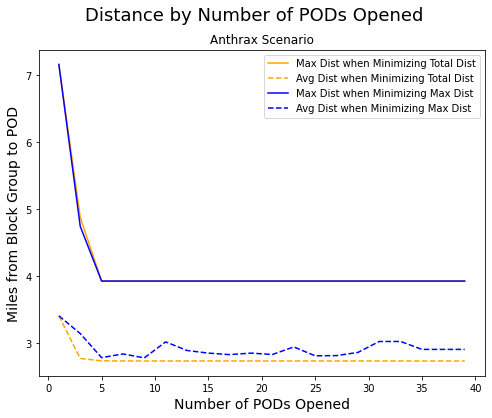

In [88]:
plt.figure(figsize=(8,6))

plt.plot(dist_anthrax_df['num_pods'], dist_anthrax_df['max_dist_total'], ls='-', color='orange',
         label='Max Dist when Minimizing Total Dist')
plt.plot(dist_anthrax_df['num_pods'], dist_anthrax_df['avg_dist_total'], ls='--', color='orange',
         label='Avg Dist when Minimizing Total Dist')
plt.plot(dist_anthrax_df['num_pods'], dist_anthrax_df['max_dist_minmax'], 
         'b-', label='Max Dist when Minimizing Max Dist')
plt.plot(dist_anthrax_df['num_pods'], dist_anthrax_df['avg_dist_minmax'], 
         'b--', label='Avg Dist when Minimizing Max Dist')
plt.suptitle('Distance by Number of PODs Opened', size=18)
plt.title('Anthrax Scenario')
plt.ylabel('Miles from Block Group to POD', size=14)
plt.xlabel('Number of PODs Opened', size=14)
plt.legend()
plt.show()

### Histograms

Global- Opening 19 PODs:

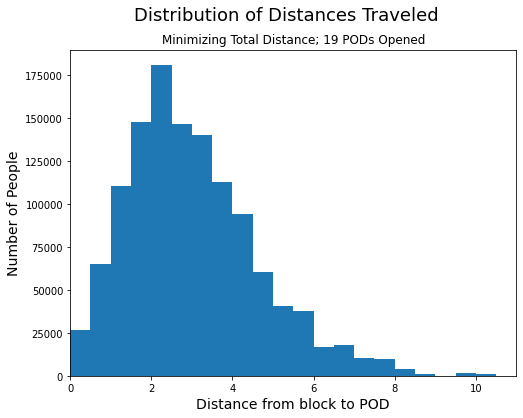

In [47]:
plt.figure(figsize=(8,6))
plt.hist([dist[j,i] for [j,i] in pods_total2[19]], 
         weights=[N[j] for [j,i] in pods_total2[19]], 
         bins=np.arange(0,11,.5))
plt.suptitle('Distribution of Distances Traveled', size=18)
plt.title('Minimizing Total Distance; 19 PODs Opened')
plt.xlabel('Distance from block to POD', size=14)
plt.ylabel('Number of People', size=14)
plt.xlim(0, 11)
plt.ylim(0, 190000)
plt.show()

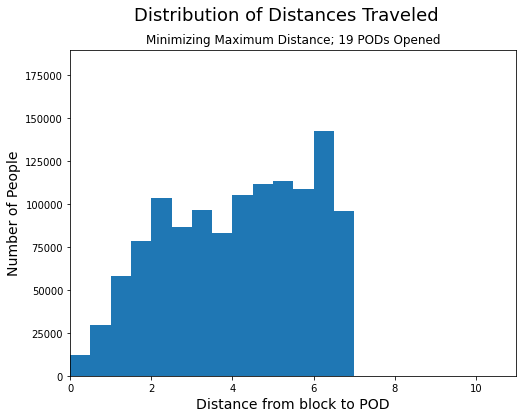

In [48]:
plt.figure(figsize=(8,6))
plt.hist([dist[j,i] for [j,i] in pods_minmax2[19]], 
         weights=[N[j] for [j,i] in pods_minmax2[19]], 
         bins=np.arange(0,11,.5))
plt.suptitle('Distribution of Distances Traveled', size=18)
plt.title('Minimizing Maximum Distance; 19 PODs Opened')
plt.xlabel('Distance from block to POD', size=14)
plt.ylabel('Number of People', size=14)
plt.xlim(0, 11)
plt.ylim(0, 190000)
plt.show()

Flooding scenario

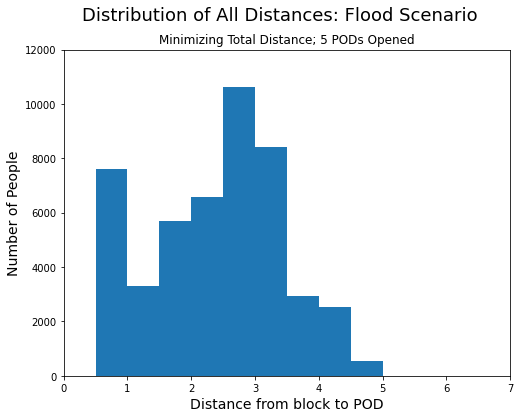

In [63]:
plt.figure(figsize=(8,6))
plt.hist([dist[j,i] for [j,i] in pods_flood_total2[5]], 
         weights=[N[j] * f_prop[j] for [j,i] in pods_flood_total2[5]], 
         bins=np.arange(0,7,.5))
plt.suptitle('Distribution of All Distances: Flood Scenario', size=18)
plt.title('Minimizing Total Distance; 5 PODs Opened')
plt.xlabel('Distance from block to POD', size=14)
plt.ylabel('Number of People', size=14)
plt.xlim(0, 7)
plt.ylim(0, 12000)
plt.show()

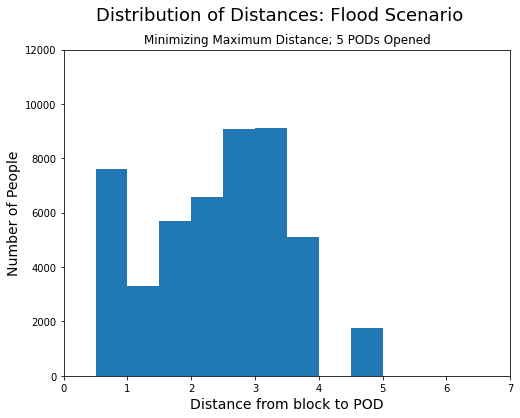

In [62]:
plt.figure(figsize=(8,6))
plt.hist([dist[j,i] for [j,i] in pods_flood_minmax2[5]], 
         weights=[N[j] * f_prop[j] for [j,i] in pods_flood_minmax2[5]], 
         bins=np.arange(0,7,.5))
plt.suptitle('Distribution of Distances: Flood Scenario', size=18)
plt.title('Minimizing Maximum Distance; 5 PODs Opened')
plt.xlabel('Distance from block to POD', size=14)
plt.ylabel('Number of People', size=14)
plt.xlim(0, 7)
plt.ylim(0, 12000)
plt.show()

Anthrax Scenario

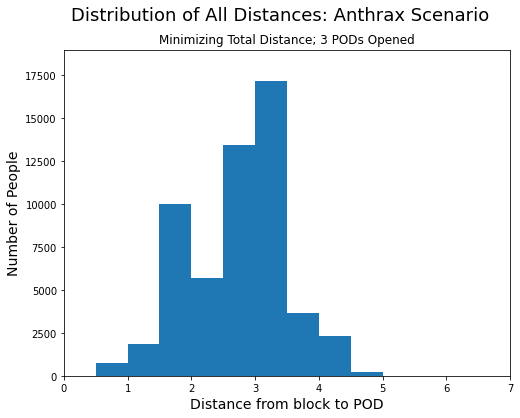

In [61]:
plt.figure(figsize=(8,6))
plt.hist([dist[j,i] for [j,i] in pods_anthrax_total[3]], 
         weights=[N[j] * a_prop[j] for [j,i] in pods_anthrax_total[3]], 
         bins=np.arange(0,7,.5))
plt.suptitle('Distribution of All Distances: Anthrax Scenario', size=18)
plt.title('Minimizing Total Distance; 3 PODs Opened')
plt.xlabel('Distance from block to POD', size=14)
plt.ylabel('Number of People', size=14)
plt.xlim(0, 7)
plt.ylim(0, 19000)
plt.show()

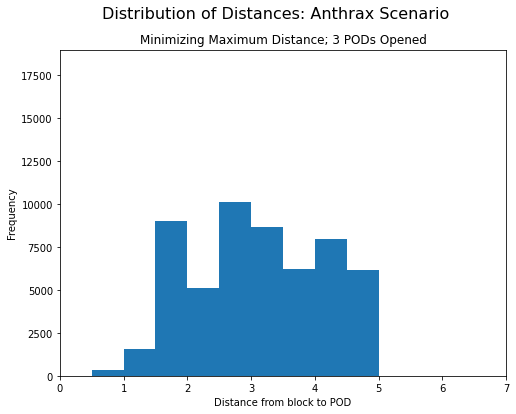

In [60]:
plt.figure(figsize=(8,6))
plt.hist([dist[j,i] for [j,i] in pods_anthrax_minmax2[3]], 
         weights=[N[j] * a_prop[j] for [j,i] in pods_anthrax_minmax2[3]], 
         bins=np.arange(0,7,.5))
plt.suptitle('Distribution of Distances: Anthrax Scenario', size=16)
plt.title('Minimizing Maximum Distance; 3 PODs Opened')
plt.xlabel('Distance from block to POD')
plt.ylabel('Frequency')
plt.xlim(0, 7)
plt.ylim(0, 19000)
plt.show()

### Top PODs

Minimize total distance

In [65]:
pods_count_total = dict.fromkeys(range(48), 0)

In [66]:
for key, value in pods_total2.items():
    pod_add = set()
    for bg, pod in value:
        pod_add.add(pod)
    for p in pod_add:
        pods_count_total[p] += 1

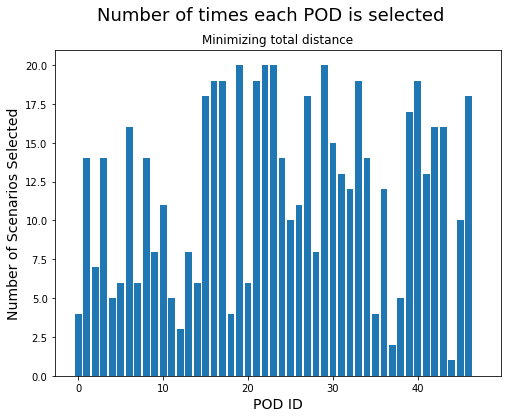

In [70]:
plt.figure(figsize=(8,6))
pod_list = []
value_list = []
for k, v in pods_count_total.items():
    pod_list.append(k)
    value_list.append(v)

plt.bar(pod_list, value_list)
plt.suptitle('Number of times each POD is selected', size=18)
plt.title('Minimizing total distance')
plt.xlabel('POD ID', size=14)
plt.ylabel('Number of Scenarios Selected', size=14)
plt.show()

Minimize maximum distance

In [71]:
pods_count_minmax = dict.fromkeys(range(48), 0)

In [72]:
for key, value in pods_minmax2.items():
    pod_add = set()
    for bg, pod in value:
        pod_add.add(pod)
    for p in pod_add:
        pods_count_minmax[p] += 1

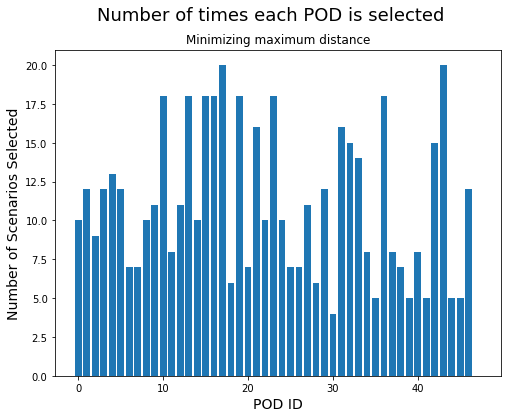

In [73]:
plt.figure(figsize=(8,6))
pod_list = []
value_list = []
for k, v in pods_count_minmax.items():
    pod_list.append(k)
    value_list.append(v)

plt.bar(pod_list, value_list)
plt.suptitle('Number of times each POD is selected', size=18)
plt.title('Minimizing maximum distance')
plt.xlabel('POD ID', size=14)
plt.ylabel('Number of Scenarios Selected', size=14)
plt.show()